# Exploratory Data Analysis (EDA)

Conduct EDA on the 'Laptop Price' to examine relationships between variables and other patterns in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#Accessing cleaned datafram from Data Wrangling book
%store -r clean_data

In [3]:
clean_data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu processor,Processor speed,HDD,SSD,Hybrid,Flash_storage
0,Apple,Ultrabook,8,Average,No OS,3.02085,1527.25,0,1,3018,Intel Processor,2.3,0,128,0,0
1,Apple,Ultrabook,8,Average,No OS,2.95470,1024.79,0,0,1698,Intel Processor,1.8,0,0,0,128
2,HP,Notebook,8,Average,No OS,4.10130,655.50,0,0,2202,Intel Processor,2.5,0,256,0,0
3,Apple,Ultrabook,16,Average,No OS,4.03515,2892.69,0,1,3396,Intel Processor,2.7,0,512,0,0
4,Apple,Ultrabook,8,Average,No OS,3.02085,2056.10,0,1,3018,Intel Processor,3.1,0,256,0,0


# Analysis of Price Data

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


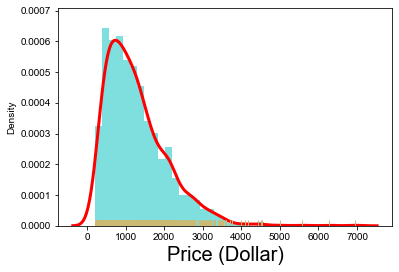

In [4]:
sns.distplot(clean_data['Price'], rug=True, rug_kws={'color':'y'},
             kde_kws={'color':'red', 'lw':3},
            hist_kws={'lw':2, 'color':'c', 'alpha':0.5})
sns.set({'figure.figsize':(20,15)})
plt.xlabel('Price (Dollar)', size=20)
plt.show()

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


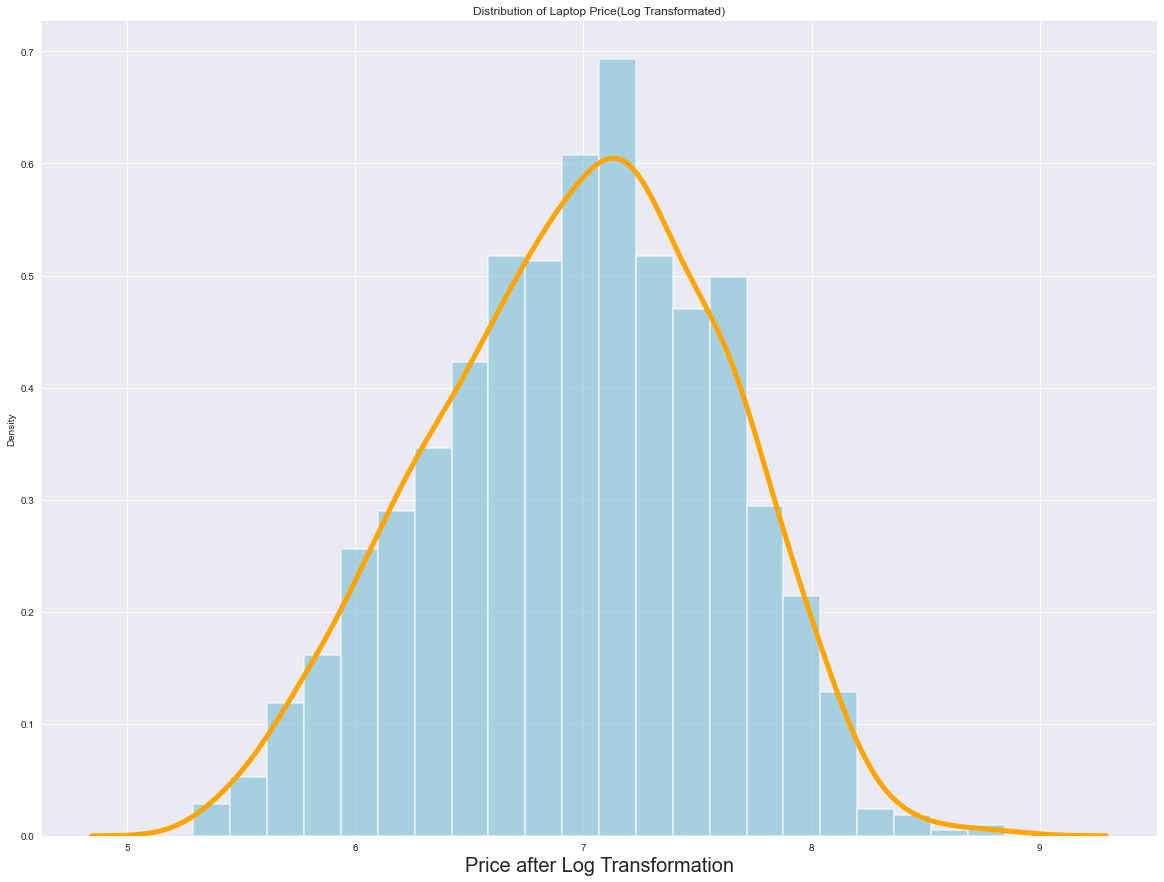

In [5]:
sns.distplot(np.log(clean_data['Price']), kde_kws={'color':'orange', 'lw':5},
            hist_kws={'lw':2, 'color':'c', 'alpha':0.5})
sns.set({'figure.figsize':(20,15)})
plt.title('Distribution of Laptop Price(Log Transformated)')
plt.xlabel('Price after Log Transformation', size=20)
plt.show()


Our target variable is ‘Price’ and the ‘Price’ data is skewed to right. That’s self-explanatory; many laptops in the market have lower prices and few have high prices. Real life distributions are usually skewed. In skewed data, the tail region may act as an outlier for the statistical model, and outliers adversely affect the model ’s performance, especially regression-based models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. A log transformation can help to fit a skewed distribution into a Gaussian one.

# Analysis of 'Different Laptop Company'

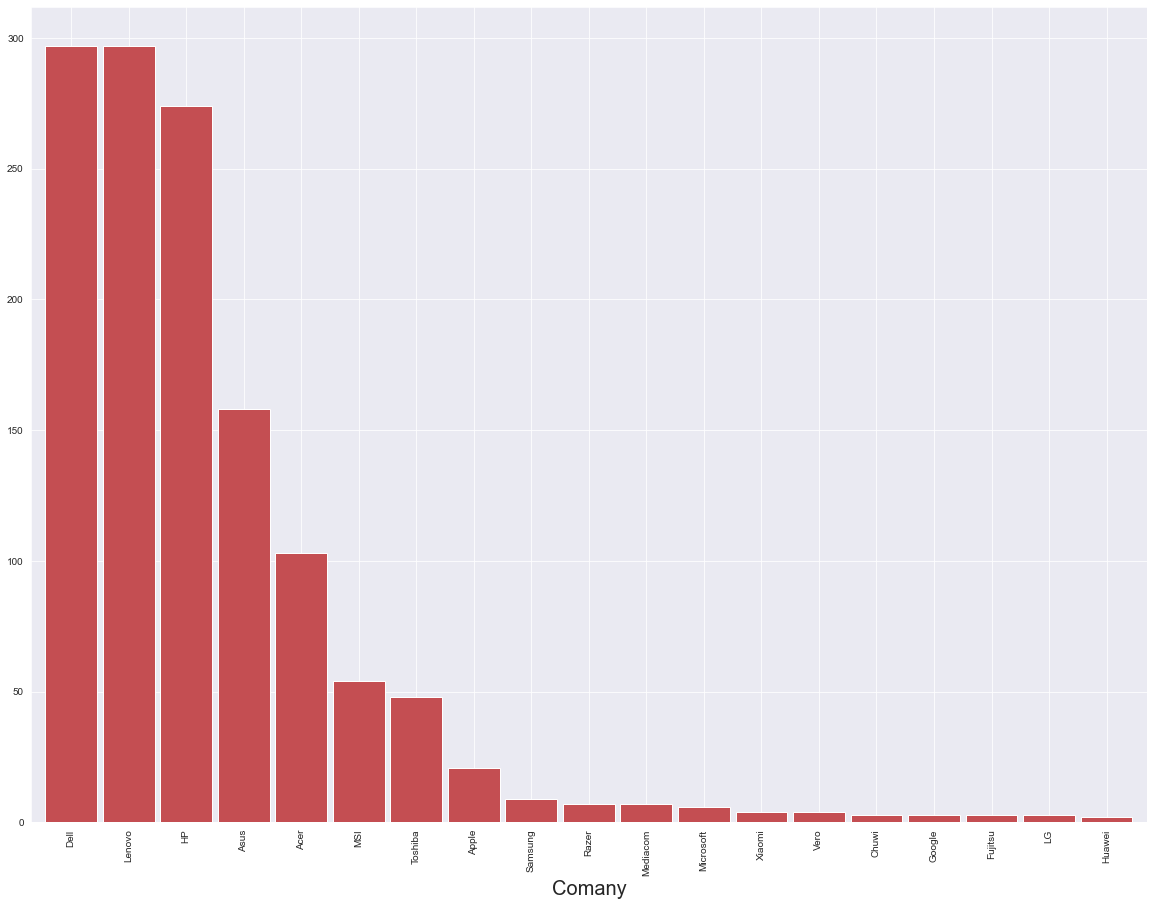

In [6]:
clean_data['Company'].value_counts().plot(kind='bar', width= 0.9, color='r')
plt.xlabel('Comany', size=20)
plt.show()

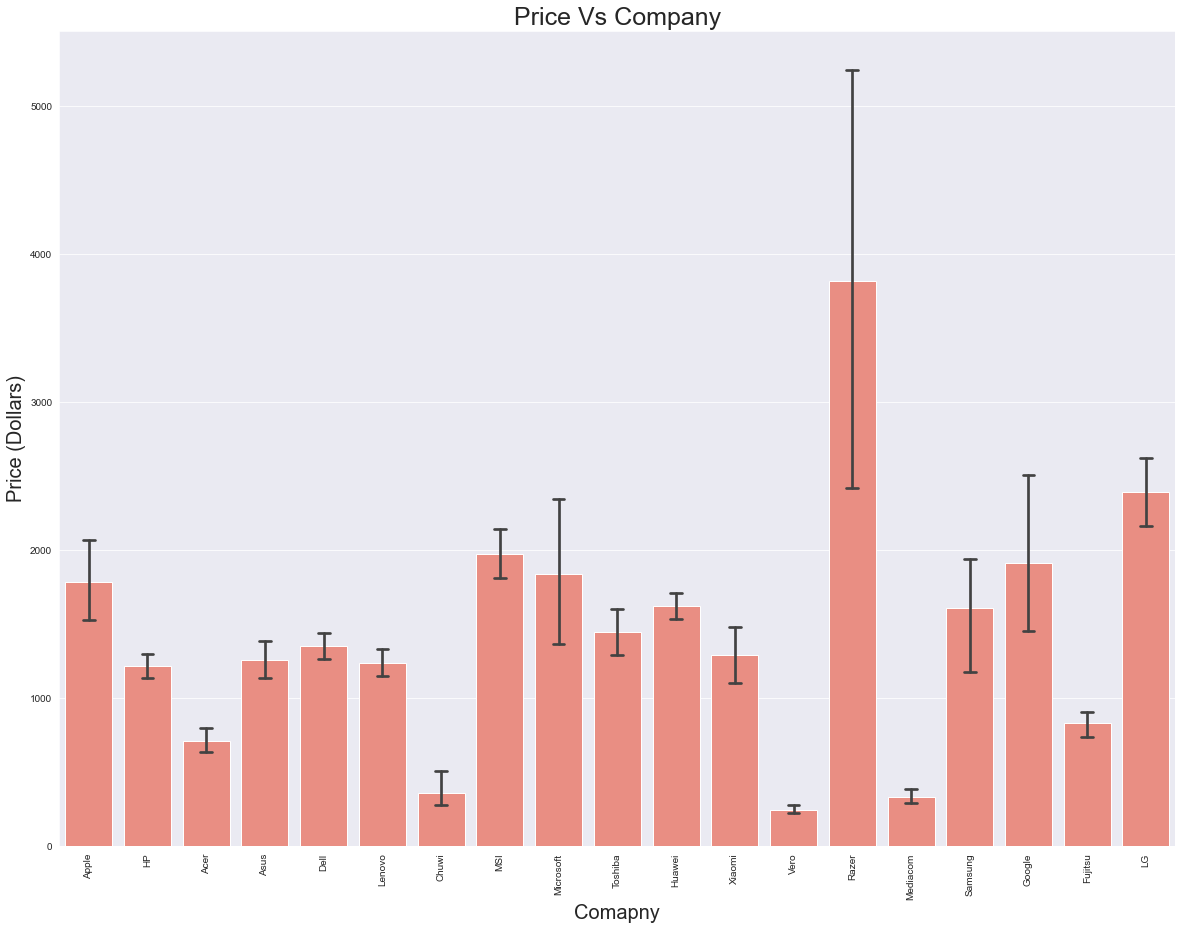

In [7]:
rc=sns.barplot(x=clean_data['Company'], y=clean_data['Price'], color='salmon', capsize=.2)
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Price Vs Company', size=25)
plt.xlabel('Comapny', size=20)
plt.ylabel('Price (Dollars)', size=20)
plt.xticks(rotation='vertical')
plt.show()

At first glance, it would make sense that Dell, Lenovo, HP, Asus, Acer, MSI, Toshiba have high demand, where as Apple, Samsung, Razer etc, are not demandable.
Brand makes a significant difference in price. Razer, LG, Google, Samsung, Microsoft, MSI, Apple brands have higher prices, and, HP, Acer, Asus, Dell, etc. are budget brands.

#  Analysis of 'Different Type of Laptops'
What type of laptop you are buying, that affect the price. Notebooks are selling high but it's price effective, workstation has high range laptops.

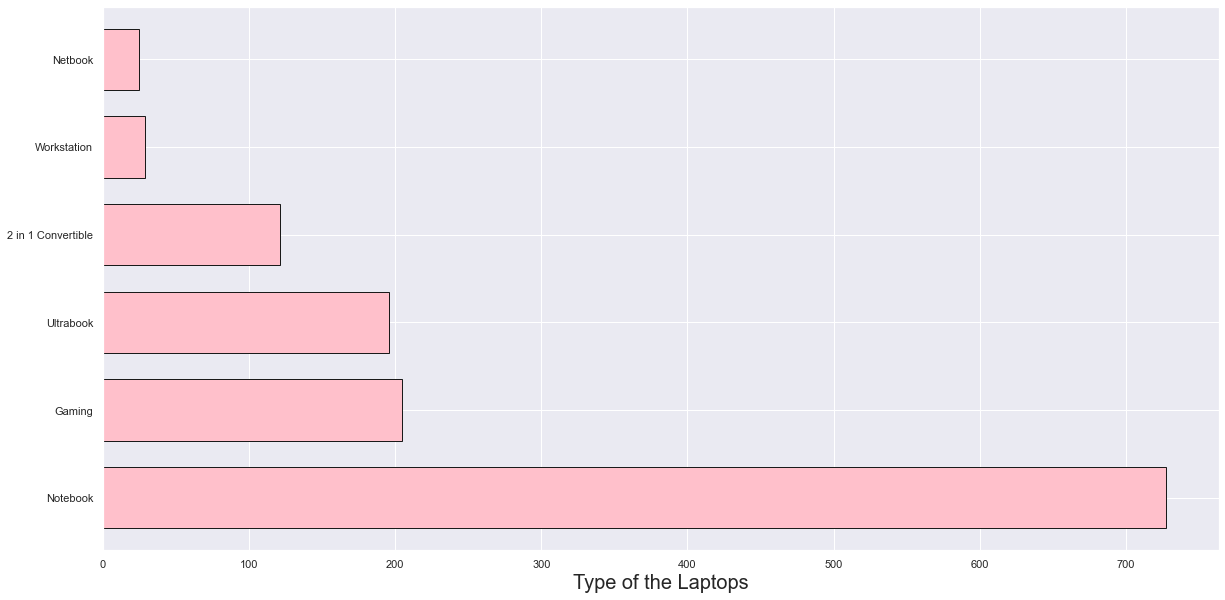

In [8]:
clean_data['TypeName'].value_counts().plot(kind='barh', width= 0.7, color='pink', edgecolor='k')
plt.xlabel('Type of the Laptops', size=20)
plt.show()

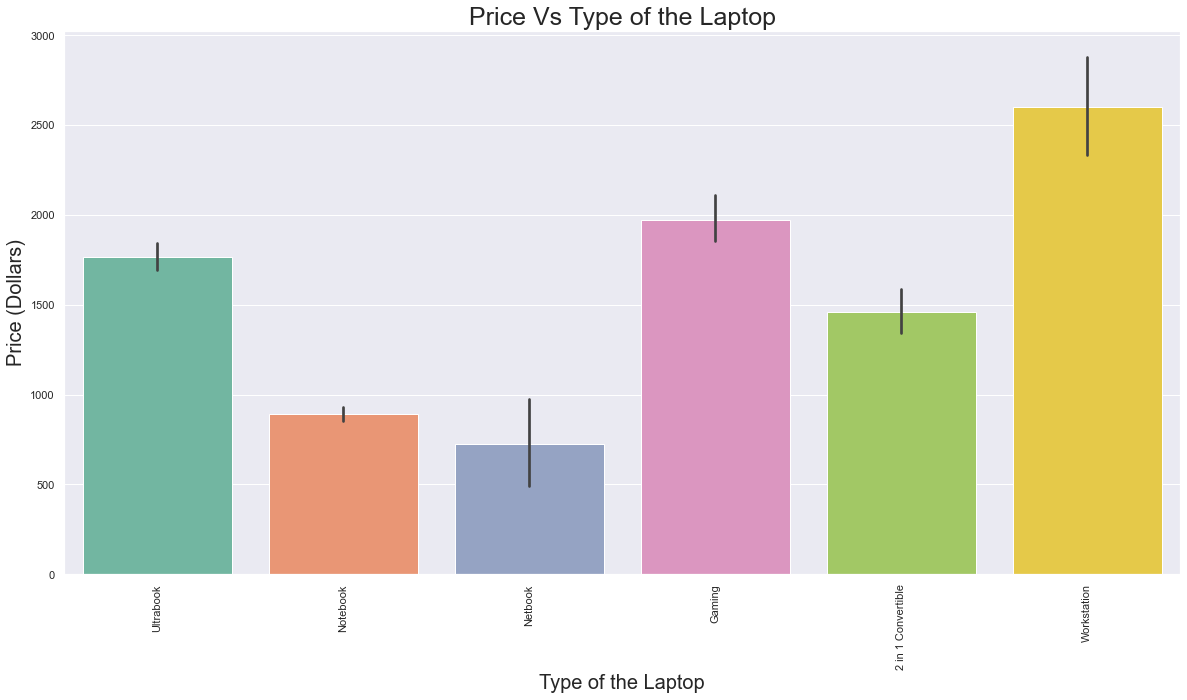

In [9]:
sns.barplot(x=clean_data['TypeName'], y=clean_data['Price'], palette='Set2')
sns.set({'figure.figsize':(20,10)})
plt.title('Price Vs Type of the Laptop', size=25)
plt.xlabel('Type of the Laptop', size=20)
plt.ylabel('Price (Dollars)', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Analysis of 'Touch Screen' Specification
We have about 85% no touch screen laptops, and 15% touch screen laptops, and Touch Screen laptop price is higher than 'No touch screen' specification. 

In [10]:
touch = clean_data['TouchScreen'].value_counts()
touch

0    1111
1     192
Name: TouchScreen, dtype: int64

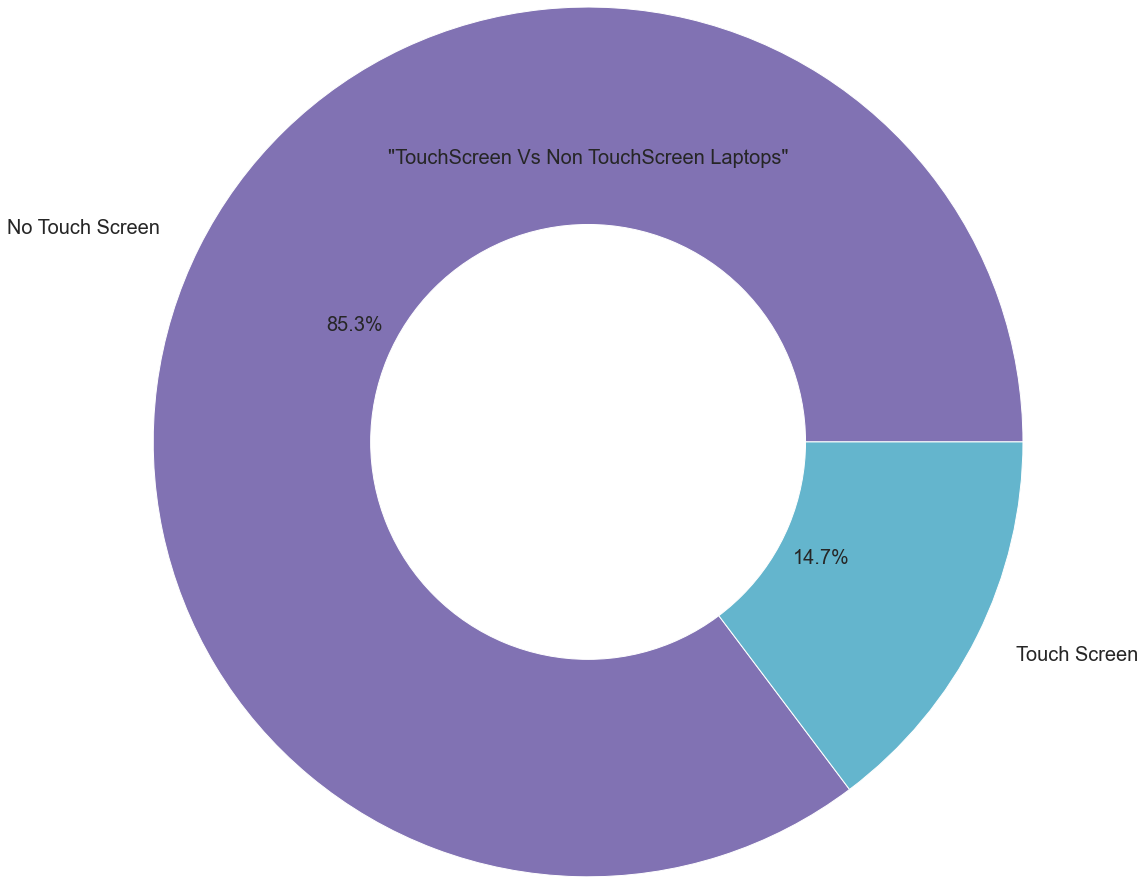

In [11]:
label = ['No Touch Screen', 'Touch Screen']
touchscreen = touch[0]
No_touchscreen = touch[1]
plt.pie(touch, labels=label,autopct= '%0.1f%%', colors=['m', 'c'], radius=2, textprops={'fontsize':20,})
plt.pie([1], colors=['w'], radius=1)
sns.set({'figure.figsize':(10,7)})
plt.title('"TouchScreen Vs Non TouchScreen Laptops"', size=20)
plt.show()


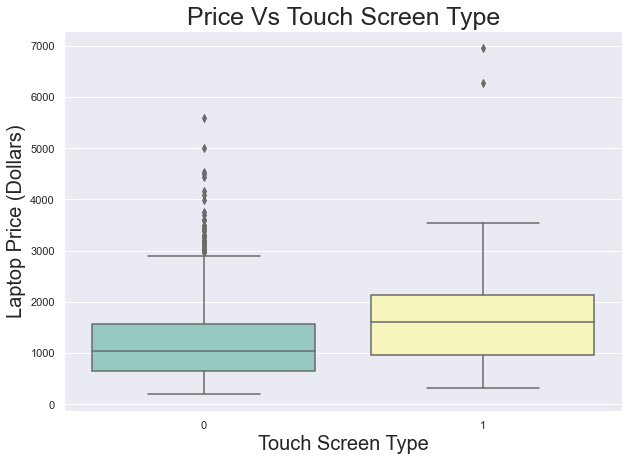

In [12]:
sns.boxplot(x=clean_data['TouchScreen'], y=clean_data['Price'], palette='Set3')
sns.set({'figure.figsize':(20,10)})
plt.title('Price Vs Touch Screen Type', size=25)
plt.xlabel('Touch Screen Type', size=20)
plt.ylabel('Laptop Price (Dollars)', size=20)
plt.show()

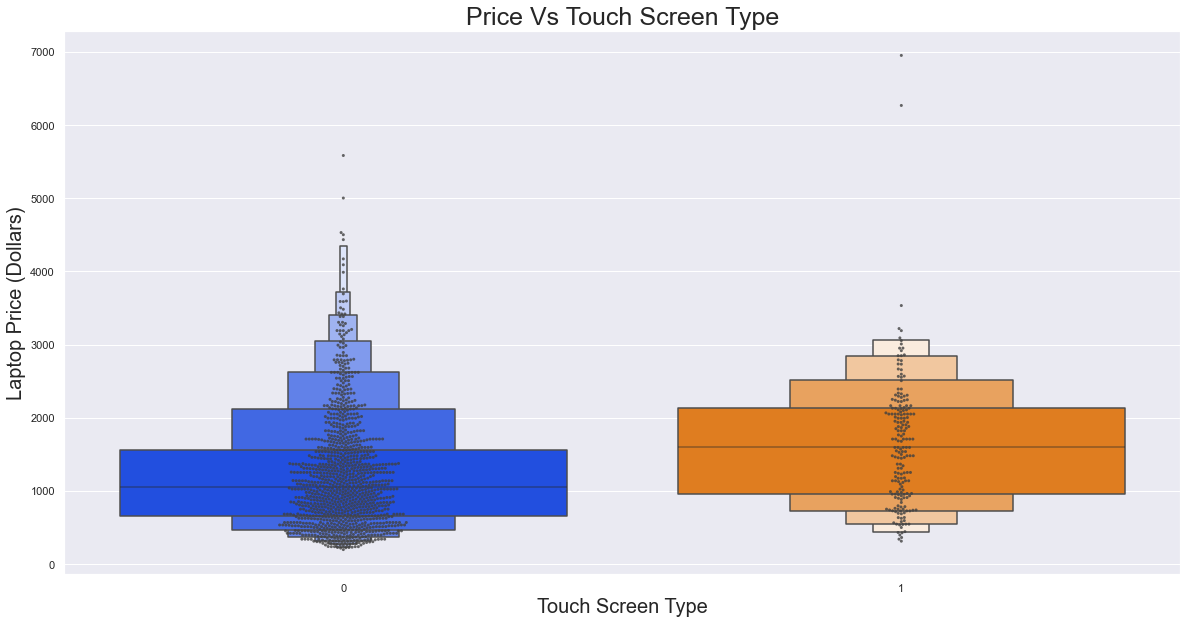

In [13]:
sns.boxenplot(x=clean_data['TouchScreen'], y=clean_data['Price'], palette='bright', showfliers = False)
sns.swarmplot(x=clean_data['TouchScreen'], y=clean_data['Price'], size = 3, color='.25', alpha=0.8)
sns.set({'figure.figsize':(20,10)})
plt.title('Price Vs Touch Screen Type', size=25)
plt.xlabel('Touch Screen Type', size=20)
plt.ylabel('Laptop Price (Dollars)', size=20)
plt.show()

#  Analysis of 'IPS Panel' Specification

In [14]:
ips = clean_data['IPS'].value_counts()
ips

0    938
1    365
Name: IPS, dtype: int64

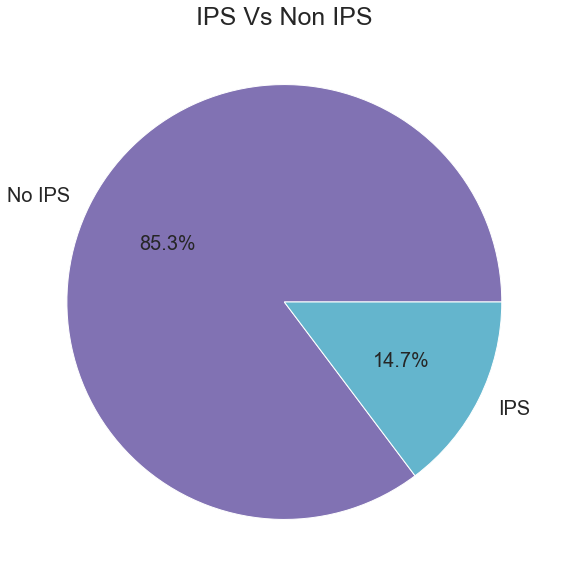

In [15]:
label_2 = ['No IPS', 'IPS']
ips_result = ips[0]
No_touchscreen = ips[1]
plt.pie(touch, labels=label_2, autopct= '%0.1f%%', colors=['m', 'c'], textprops={'fontsize':20,})
sns.set({'figure.figsize':(20,10)})
plt.title('IPS Vs Non IPS', size=25)
plt.show()

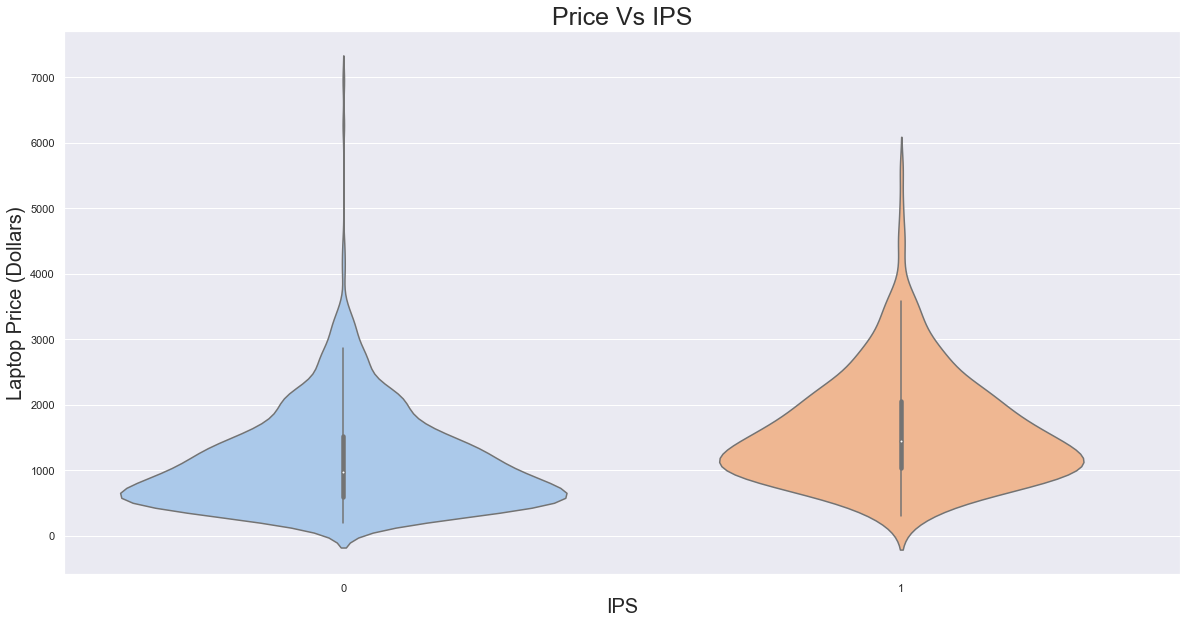

In [16]:
sns.violinplot(x=clean_data['IPS'], y=clean_data['Price'], showmedians=True, palette='pastel')
sns.set({'figure.figsize':(20,10)})
plt.title('Price Vs IPS', size=25)
plt.xlabel('IPS', size=20)
plt.ylabel('Laptop Price (Dollars)', size=20)
plt.show()

IPS stands for in-plane switching. An IPS monitor provides better visual quality than an LED monitor, leading to more power consumption to maintain excellent on-screen performance. Although LED monitors provide brighter screens, their power consumption is much less than IPS panel. In our dataset, Most of the laptops (about 85%) has no IPS. Non_IPS display has higher price than with IPS display.

# Analysis of 'CPU Processor'

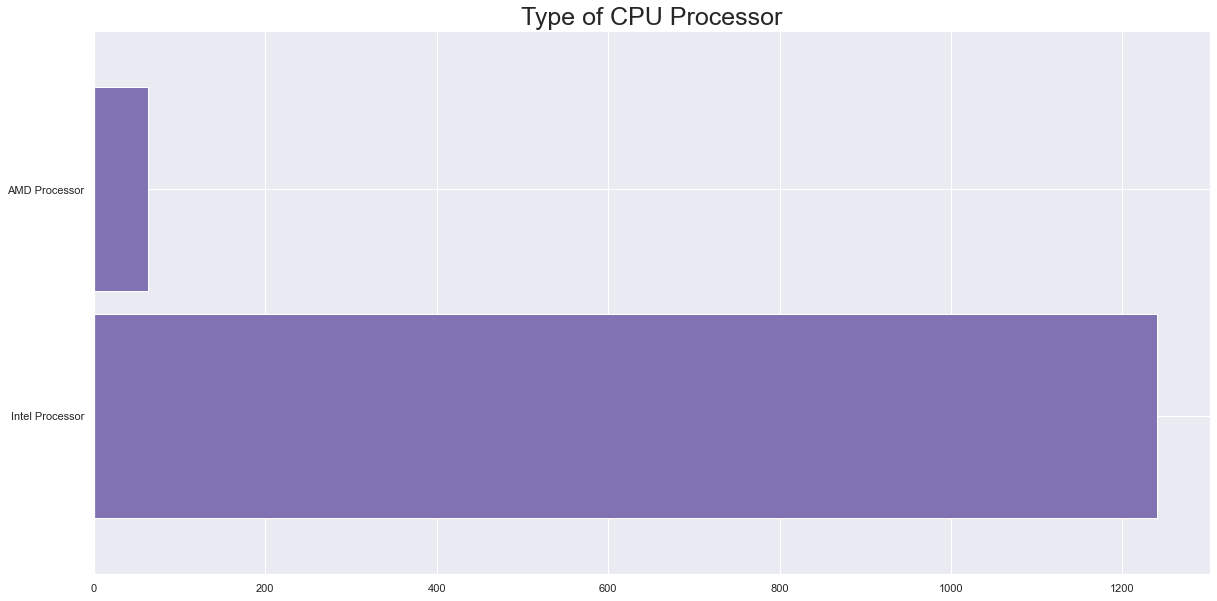

In [17]:
clean_data['Cpu processor'].value_counts().plot(kind='barh', width=0.9, color='m')
sns.set({'figure.figsize':(10,7)})
plt.title('Type of CPU Processor', size=25)
plt.show()

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


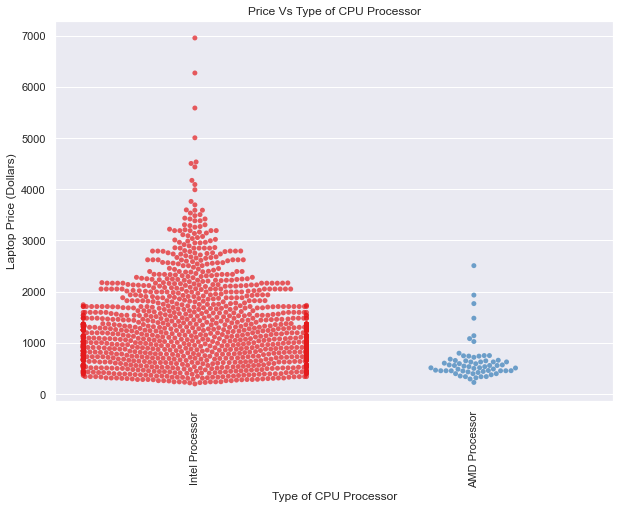

In [18]:
sns.swarmplot(x=clean_data['Cpu processor'], y=clean_data['Price'], data=clean_data, alpha=0.7, palette='Set1')
sns.set({'figure.figsize':(15,10)})
plt.title('Price Vs Type of CPU Processor')
plt.xlabel('Type of CPU Processor')
plt.ylabel('Laptop Price (Dollars)')
plt.xticks(rotation='vertical')
plt.show()

comparing AMD vs Intel CPU specifications, you can see that Intel offers options with lower pricing, more performance, and a more modern platform that supports both DDR5 and PCIe 5.0. Our data says, Intel processors are in demand. Price are highter in Intel Processors.

# Analysis of 'RAM' Specification

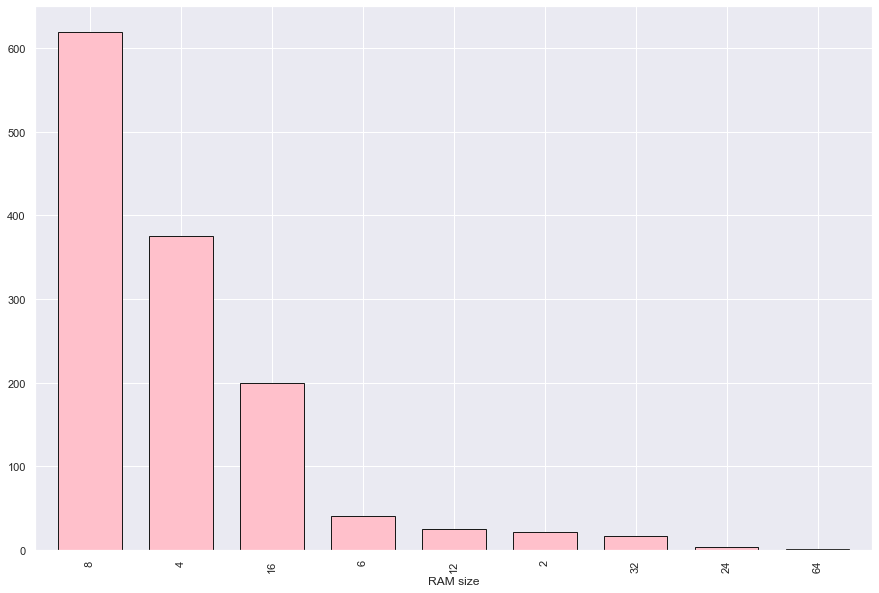

In [19]:
clean_data['Ram'].value_counts().plot(kind='bar', width= 0.7, color='pink', edgecolor='k')
sns.set({'figure.figsize':(15,10)})
plt.xlabel('RAM size')
plt.show()

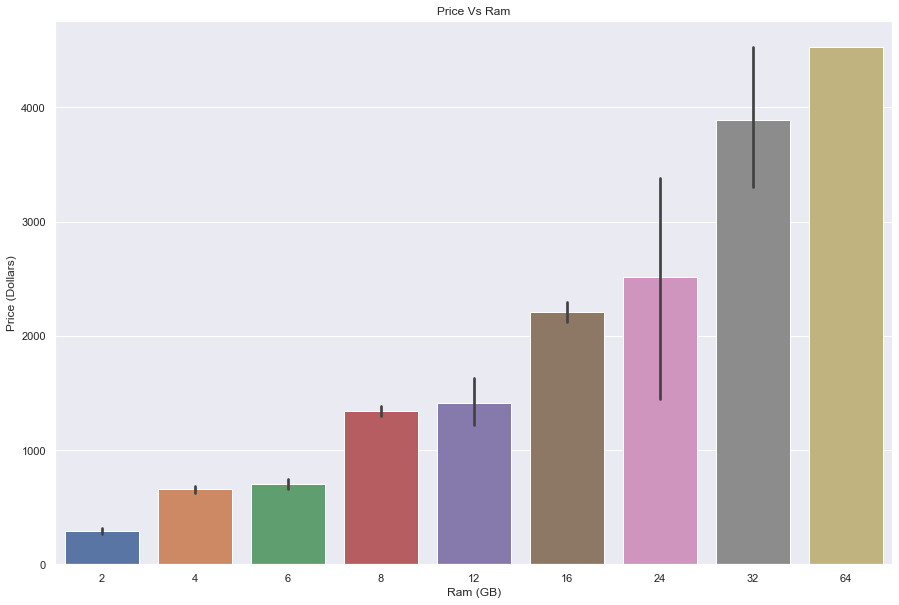

In [20]:
sns.barplot(x=clean_data['Ram'], y=clean_data['Price'])
sns.set({'figure.figsize':(15,10)})
plt.title('Price Vs Ram')
plt.xlabel('Ram (GB)')
plt.ylabel('Price (Dollars)')
plt.show()

8GB RAM seems popular. That's quite obvious that higher RAM laptops have high price. No significant difference between 8GB and 12GB. May be, due to compitition, some brand sell 12GB RAM around the 8GB price. 

It's clearly seen that 'Price' and 'Ram' has linear relationship. As RAM increses, Price increses.

# Correlation with 'Price'

In [21]:
clean_data.corr()['Price']

Ram                0.743007
Weight             0.210370
Price              1.000000
TouchScreen        0.191226
IPS                0.252208
ppi                0.556105
Processor speed    0.430293
HDD               -0.095476
SSD                0.670799
Hybrid            -0.004769
Flash_storage     -0.040511
Name: Price, dtype: float64

Price have
Weak-Negative correlation with HDD. It means, higher HDD type of Memory; lower the 'price' would be.
Strong-Positive correlation with SSD. 0.67 shows high SSD type of memory; higher the 'price' would be.
Very Weak-Negative correlation with Hybrid and Flash Storage. It doesn't make any difference in 'Price'
As 'Price' doesn't depend on the 'Hybrid' and 'Flash storage', we can ignore those variable. and GPU has same value, so we are ignoring it.

In [22]:
clean_data = clean_data.drop(columns=['Hybrid', 'Flash_storage', 'Gpu'])

# Analysis of 'Laptop Operating System' Specification

In [23]:
os = clean_data['OpSys'].value_counts()

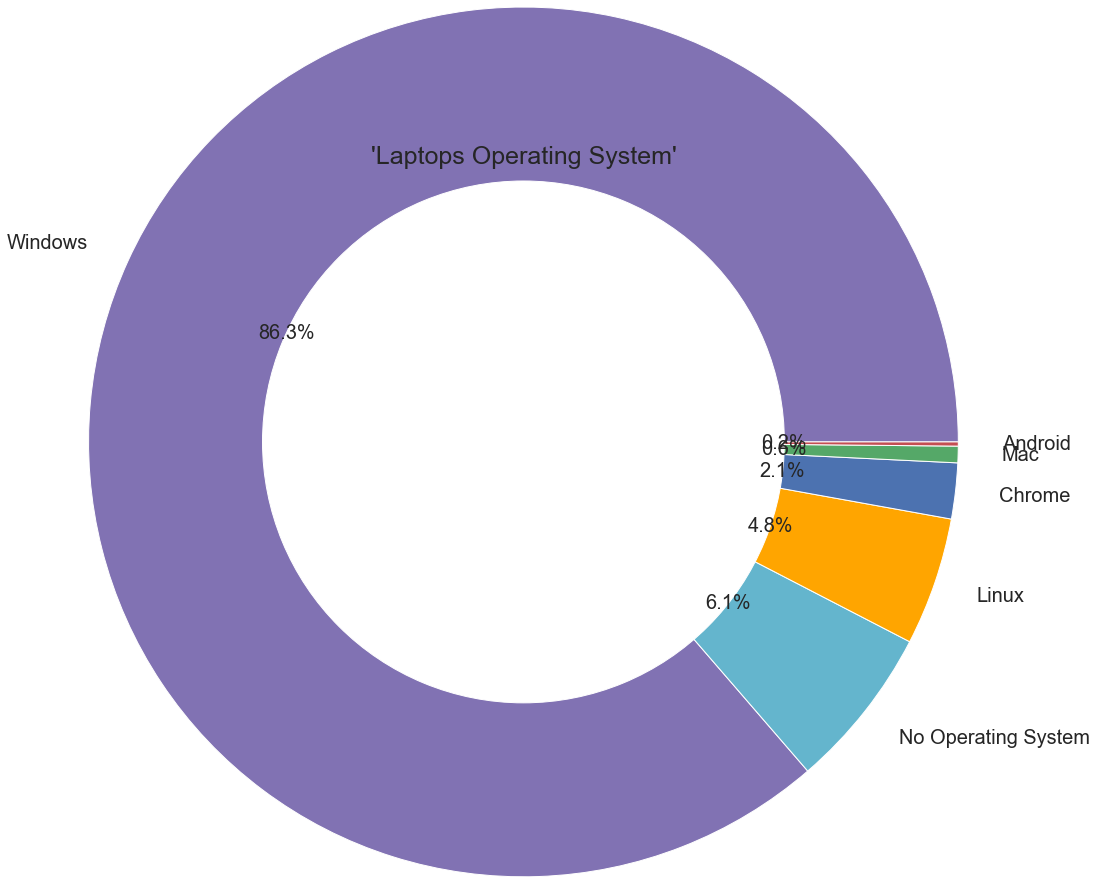

In [24]:
label_3 = ['Windows', 'No Operating System', 'Linux', 'Chrome', 'Mac', 'Android']
OpSys = [os[0], os[1], os[2], os[3], os[4], os[5]]
plt.pie(OpSys, labels=label_3,autopct= '%0.1f%%', radius=2, textprops={'fontsize':20,}, colors=['m', 'c', 'orange', 'b', 'g', 'r'])
plt.pie([1], colors=['w'], radius=1.2)
sns.set({'figure.figsize':(10,7)})
plt.title("'Laptops Operating System'", size=25)
plt.show()

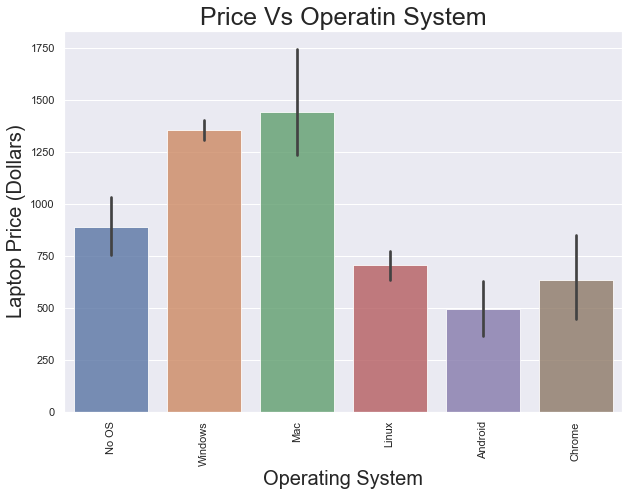

In [25]:
sns.barplot(x=clean_data['OpSys'], y=clean_data['Price'], data=clean_data, alpha=0.8)
sns.set({'figure.figsize':(20,15)})
plt.title('Price Vs Operatin System', size=25)
plt.xlabel('Operating System', size=20)
plt.ylabel('Laptop Price (Dollars)', size=20)
plt.xticks(rotation='vertical')
plt.show()

Windows operating system is in demand and 'Price' is higher in Windows and MAC operating system. 

# Correlation

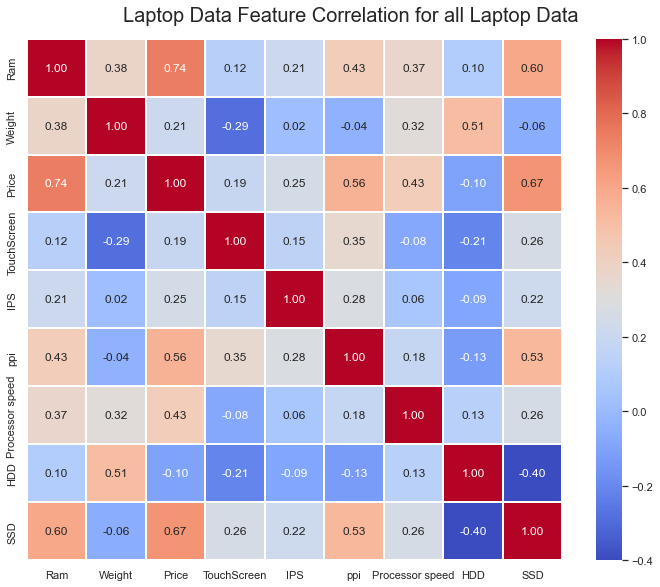

In [26]:
corr_data = clean_data.corr()
f, ax = plt.subplots(figsize=(12,9))
hmap = sns.heatmap(round(corr_data, 2), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.05)
f.subplots_adjust (top=0.93)
t = f.suptitle('Laptop Data Feature Correlation for all Laptop Data', fontsize=20)

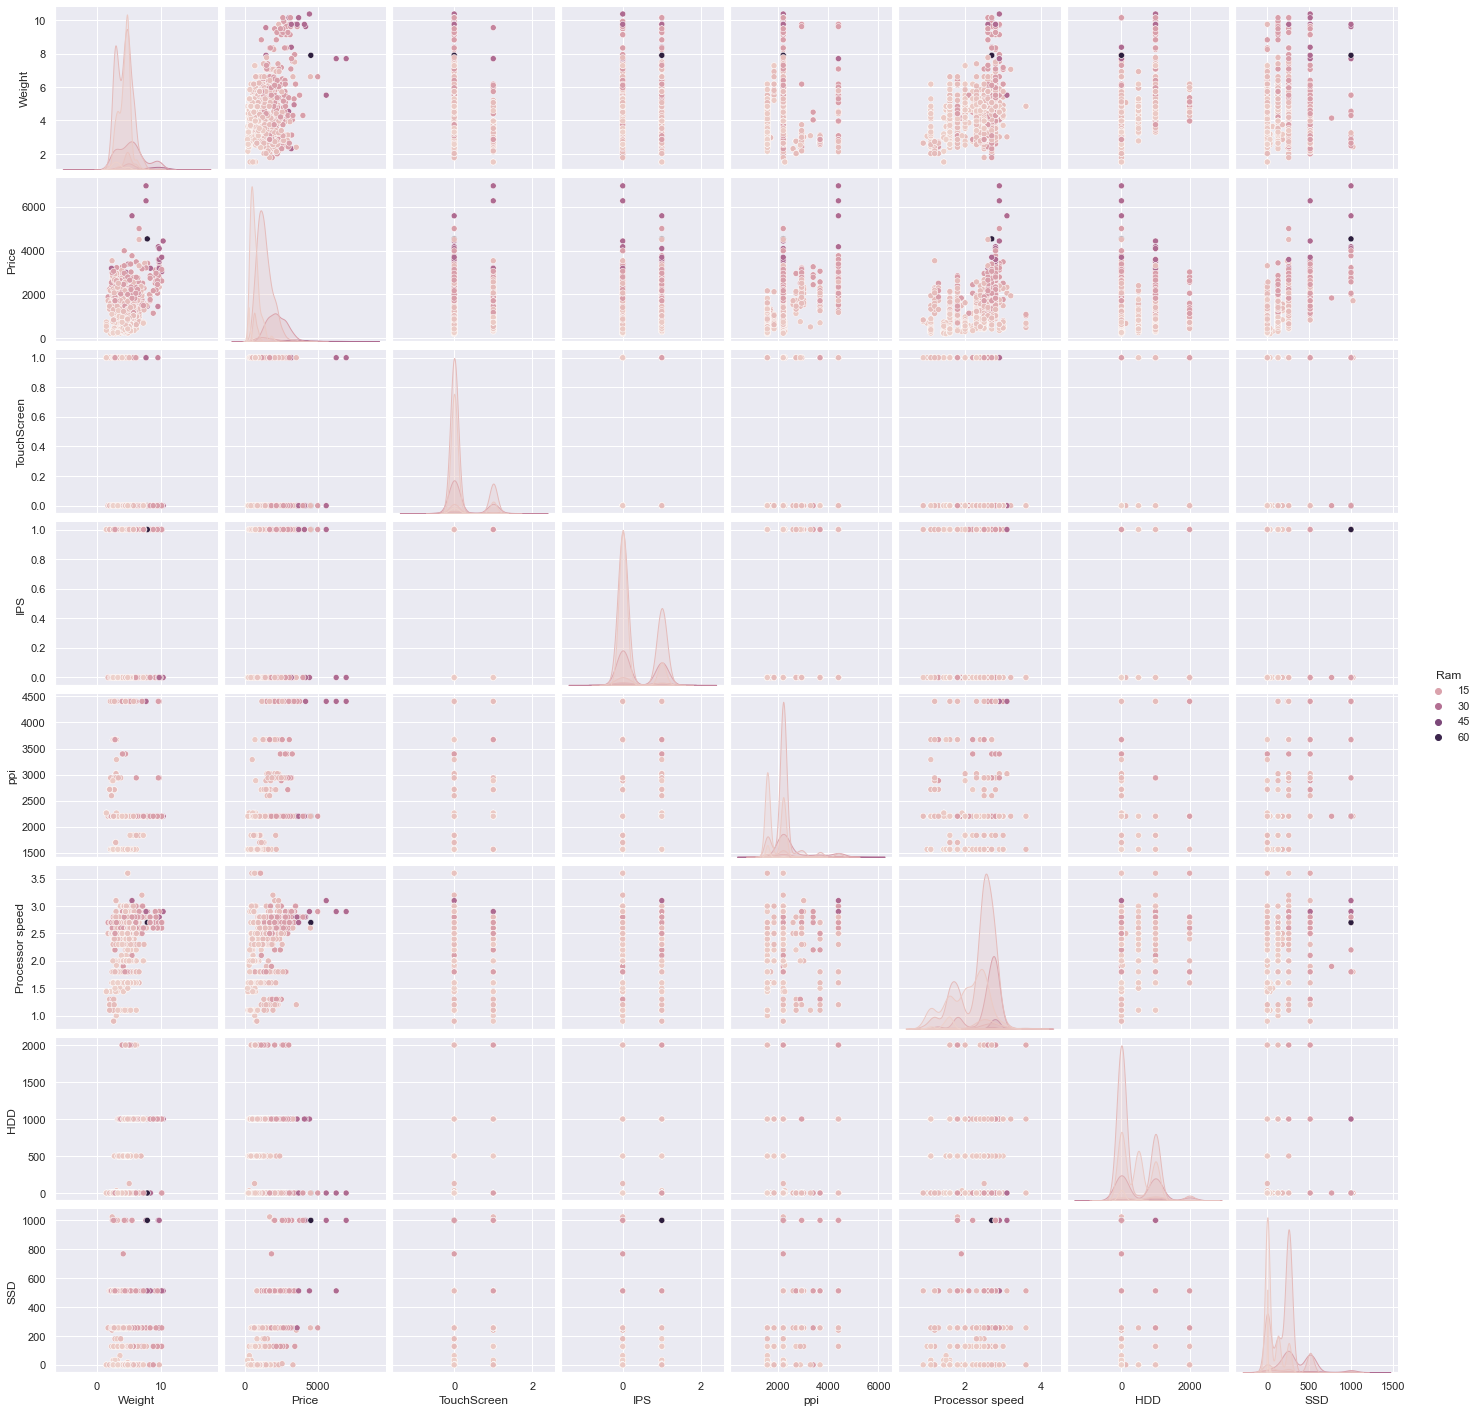

In [27]:
sns.pairplot(clean_data,hue='Ram')
plt.show()

# Visulize Notable Correlations

Strong Positive Correlation Price:RAM (0.74)

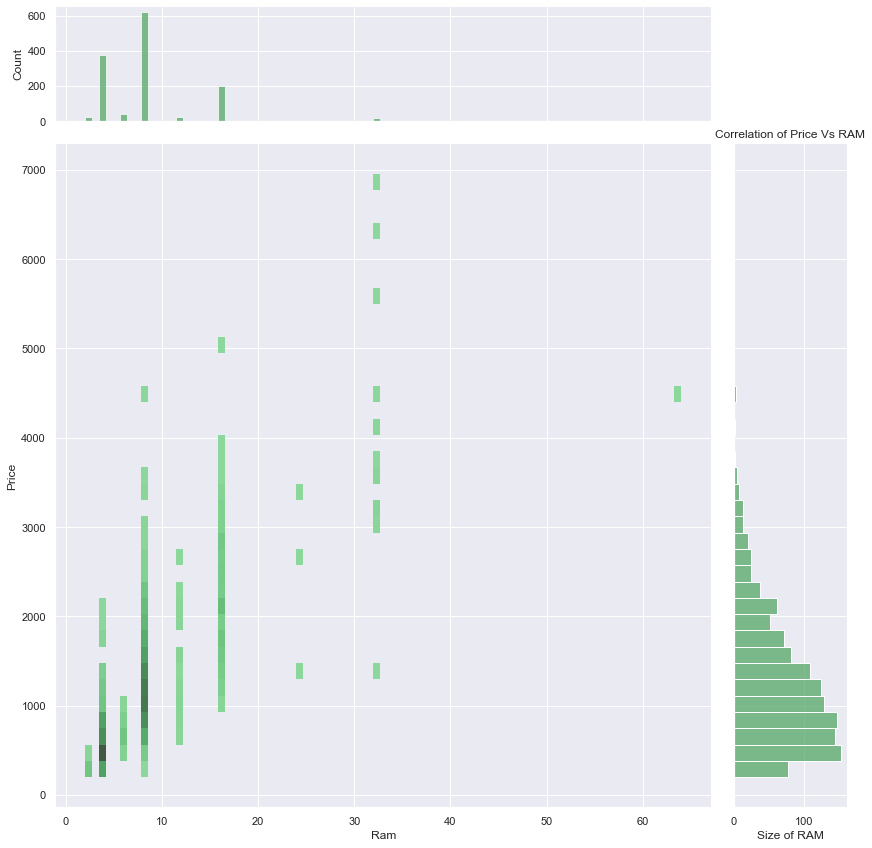

In [28]:
sns.jointplot(x='Ram', y='Price', data=clean_data, kind='hist', color='g', height=12, marginal_ticks=True)
plt.title('Correlation of Price Vs RAM')
plt.xlabel('Size of RAM')
plt.ylabel('Laptop Price (Dollars)')
plt.show()

Strong Positive Correlation Price:SSD (0.67)

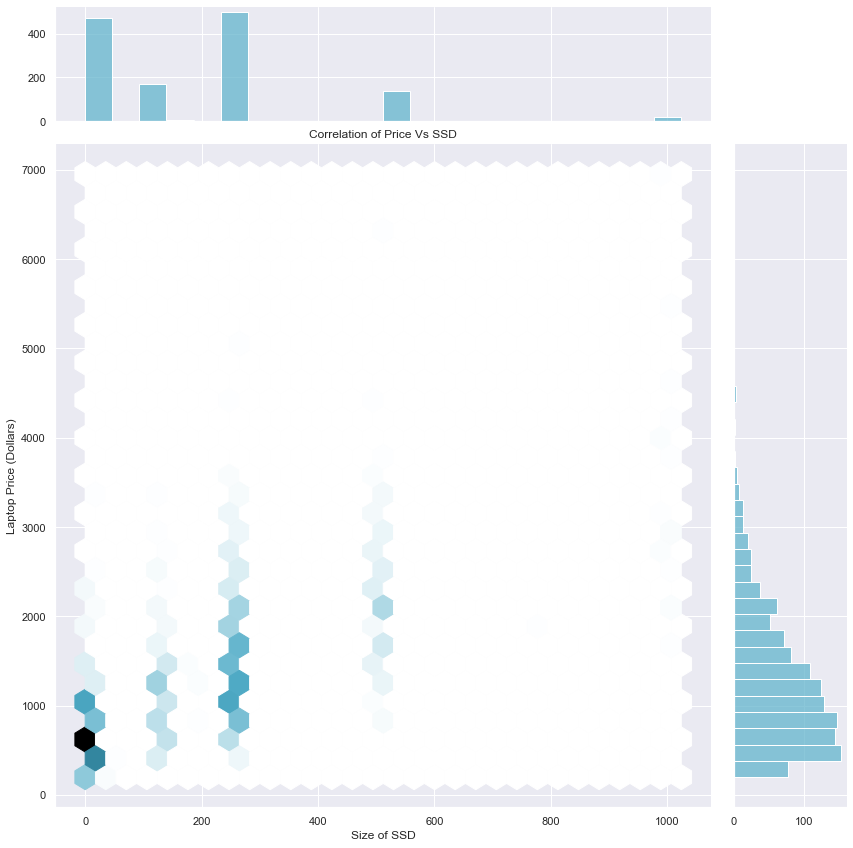

In [29]:
sns.jointplot(x='SSD', y='Price', data=clean_data, kind='hex', color='c', height=12, marginal_ticks=True)
plt.title('Correlation of Price Vs SSD')
plt.xlabel('Size of SSD')
plt.ylabel('Laptop Price (Dollars)')
plt.show()

Negative Correlation HDD:SSD (-0.40). That's not important for us as our target variable is Price.

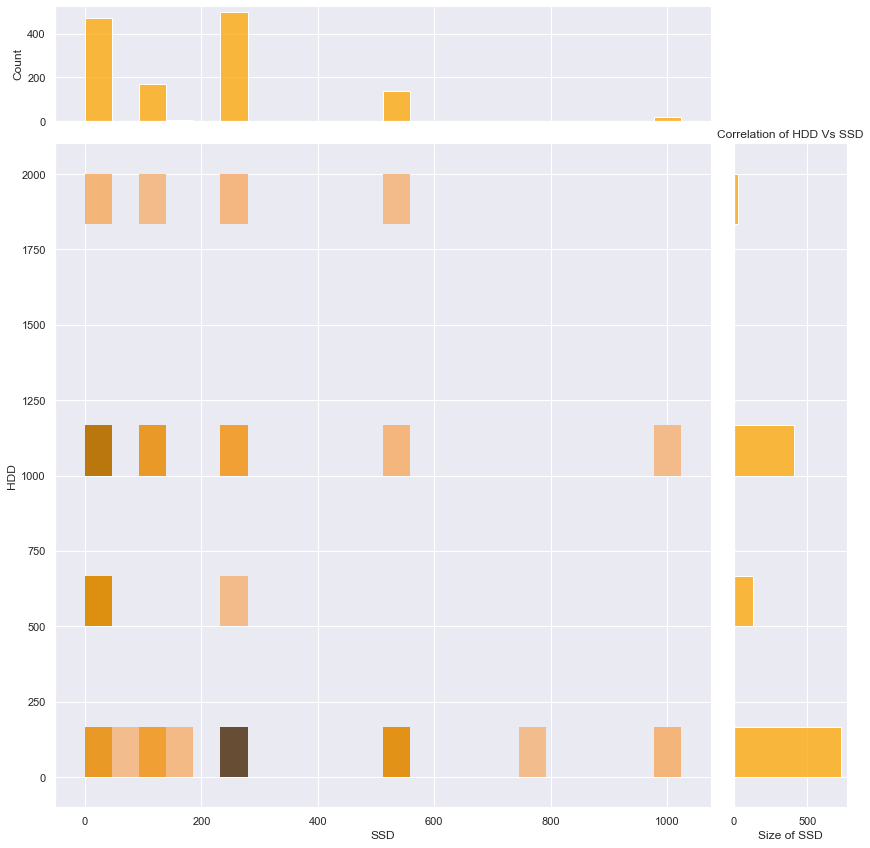

In [30]:
sns.jointplot(x='SSD', y='HDD', data=clean_data, kind='hist', color='orange', height=12, marginal_ticks=True)
plt.title('Correlation of HDD Vs SSD')
plt.xlabel('Size of SSD')
plt.ylabel('Size of HDD')
plt.show()

# Correlations

The findings from the EDA analysis of the variables and correlations revealed that the strongest positive correlation is between the Price and Size of RAM (r=0.74). This makes sense intuitively, as typically the more RAM size, the more the price of the laptop.

Additionally, there was another strong correlation between the Price and Size of SSD (r=0.67). It appears that as the size of SSD increase, so does the Price.

There were a weak-moderately strength negative correlations, between HDD and SSD (r=-0.40), suggests that as the SSD size increases, the HDD size decreases. That makes sense. A laptop has a perticular type of memory.

In [31]:
clean_laptop_data = clean_data

In [32]:
%store clean_laptop_data

Stored 'clean_laptop_data' (DataFrame)
